In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn import model_selection
%matplotlib inline

[-1.17010442 -1.25424728  0.73362772  0.52327058  0.51275272  0.38653843
  0.24980629  0.21825272 -1.90635442 -2.15878299]
[-0.92270663 -1.06748224  0.50889334  0.1455317   0.32314855  0.19186027
  0.06627565  0.02306478 -0.81892388 -1.23815484]
294 65.42916678681614 0.024746280932986437
(294,)
[-1.28580085  0.90191343  0.83880629  0.46016343  0.26032415  0.51275272
  1.25952058  1.12278843  1.28055629  1.55402058]
[-1.47985118  0.70459077  0.66718497  0.44385457  0.07790995  0.74233285
  1.60662156  1.46866721  1.41197493  1.23467039]
294 63.11618947757771 0.023871478622381887
(294,)
[ 0.77569915  0.72310986  0.63896701 -1.39097942  0.64948486  0.71259201
  0.51275272  0.41809201  0.38653843  0.39705629]
[ 0.5897184   0.49875935  0.65764462 -0.92605023  0.76844336  0.90298922
  0.61234047  0.32449631  0.1870086   0.19800072]
294 51.16876843245639 0.019352786850399543
(294,)
[ 0.70207415  0.35498486  0.59689558 -2.29551514 -2.35862228 -2.51639014
  0.75466343  0.60741343  0.48119915  0

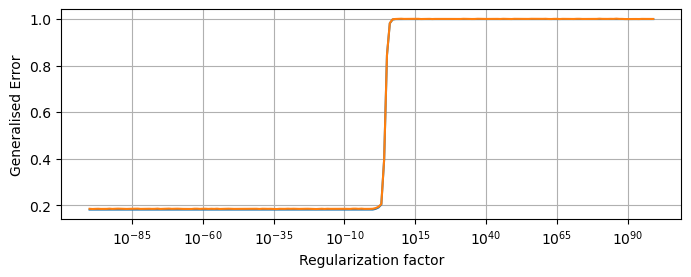

In [2]:

data = pd.read_csv("StandardizedDataFrameWithNansFilled.csv", index_col=0)
data["Status"] = [1 if stat == "Developed" else 0 for stat in data["Status"]]
data.head()

y = data['Life expectancy '].values
y=y.T
X_drop = data.drop(columns = ['Country','Year','Life expectancy '])

# Add offset attribute
attributeNames = X_drop.columns
X_drop = np.concatenate((np.ones((X_drop.shape[0],1)),X_drop),1)
attributeNames = [u'Offset']+attributeNames
N, M = X_drop.shape
X = X_drop

# Values of lambda
lambdas = np.power(10.,range(-100,100))

# Initialize variables


Test =[]
Train =[]
for lamb in lambdas:
    ## Crossvalidation
    # Create crossvalidation partition for evaluation
    K = 10
    CV = model_selection.KFold(K, shuffle=True)

    Error_train_rlr = np.zeros((K,1))
    Error_test_rlr = np.zeros((K,1))

    w_rlr = np.empty((M,K))

    k=0
    for train_index, test_index in CV.split(X,y):
        
        # extract training and test set for current CV fold
        X_train = X[train_index]
        y_train = y[train_index]
        X_test = X[test_index]
        y_test = y[test_index]

        Xty = X_train.T @ y_train
        XtX = X_train.T @ X_train

        # Estimate weights for the value of lambda, on entire training set
        lambdaI = lamb * np.eye(M)
        lambdaI[0,0] = 0 # Do no regularize the bias term
        w_rlr[:,k] = np.linalg.solve(XtX+lambdaI,Xty).squeeze()
        # Compute mean squared error with regularization with lambda
        Error_train_rlr[k] = np.square(y_train-X_train @ w_rlr[:,k]).sum(axis=0)/y_train.shape[0]
        Error_test_rlr[k] = ((y_test-X_test @ w_rlr[:,k])**2).sum(axis=0)/y_test.shape[0]

        print(y_test[:10])
        print((X_test @ w_rlr[:,k])[:10])
        print(len((y_test-X_test @ w_rlr[:,k])**2), sum((y_test-X_test @ w_rlr[:,k])**2), sum((y_test-X_test @ w_rlr[:,k])**2)/y_train.shape[0])
        print(y_test.shape)
        k +=1

        
    Test.append(np.mean(Error_test_rlr))
    Train.append(np.mean(Error_train_rlr))

plt.figure(figsize=(8, 6))
plt.subplot(2,1,1)        
plt.semilogx(lambdas,Train) # Don't plot the bias term\
plt.semilogx(lambdas,Test) # Don't plot the bias term
plt.xlabel('Regularization factor')
plt.ylabel('Generalised Error')
plt.grid()

print(Test[0])




In [3]:
print(Train)

[0.18129134635364674, 0.18133173524404086, 0.18130760825512765, 0.1812806929791456, 0.18131887830015186, 0.18132253383133992, 0.1813106371811476, 0.18126246031157547, 0.18131516186816213, 0.1812847129584477, 0.181258770098502, 0.18127650040883939, 0.18131737531518094, 0.18131897243401712, 0.18130544111978514, 0.18128811976606118, 0.1812600367106208, 0.181260618978981, 0.18131549595003701, 0.18130913370755916, 0.18131717784281937, 0.1812851580196909, 0.18130969367526345, 0.1812974325759283, 0.18125237397391633, 0.18132405467825866, 0.18129638657395608, 0.1812811346469046, 0.18126226989716, 0.18130190033154625, 0.18128798398295648, 0.18126705042991803, 0.18130088024356766, 0.18131373573970472, 0.18131229594323117, 0.1813304117296029, 0.18132578860761792, 0.18127308021662664, 0.18127312464433437, 0.181318709854348, 0.18128599118404318, 0.18128127701787086, 0.18131676637849298, 0.18128611848679582, 0.1813088483263725, 0.18126767266830104, 0.18132787967032987, 0.18131478314163346, 0.1812828

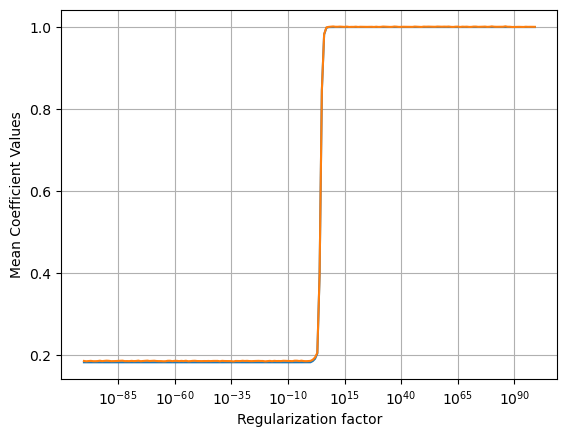

In [4]:
plt.semilogx(lambdas,Train) # Don't plot the bias term\
plt.semilogx(lambdas,Test) # Don't plot the bias term
plt.xlabel('Regularization factor')
plt.ylabel('Mean Coefficient Values')
plt.grid()

In [5]:
from automation import Tester

In [17]:
def linear_regression(X_train, X_test, y_train, y_test, lamb):
    Xty = X_train.T @ y_train
    XtX = X_train.T @ X_train

    # Estimate weights for the value of lambda, on entire training set
    N, M = X_train.shape
    lambdaI = lamb * np.eye(M)
    lambdaI[0,0] = 0 # Do no regularize the bias term
    W = np.linalg.solve(XtX+lambdaI,Xty).squeeze()
    # Compute mean squared error with regularization with lambda
    Error_test = ((y_test-X_test @ W)**2).sum(axis=0)/y_test.shape[0]
    # Whatever you want
    MSE = Error_test
    return [MSE.tolist()]




In [18]:
lambdas = np.power(10.,range(-100,100))
errors = {}
for lamb in lambdas:
    path = '/Users/william/Documents/University/civil engineering year 4/Semester 1 DTU/Introduction to machine learning/DTU_MachineLearning/Project2/StandardizedDataFrameWithNansFilled.csv'
    tester = Tester('LifeExpectancyRegression', path_to_data=path, function_to_test=linear_regression, final_test=False, k = 10, function_variable = lamb)
    errors[lamb] =tester.error

Training and testing...: 100%|██████████| 10/10 [00:00<00:00, 437.18it/s]

TypeError: unsupported operand type(s) for +: 'int' and 'list'

[tensor(0.2050, dtype=torch.float64), tensor(0.2050, dtype=torch.float64), tensor(0.2050, dtype=torch.float64), tensor(0.2050, dtype=torch.float64), tensor(0.2050, dtype=torch.float64), tensor(0.2050, dtype=torch.float64), tensor(0.2050, dtype=torch.float64), tensor(0.2050, dtype=torch.float64), tensor(0.2050, dtype=torch.float64), tensor(0.2050, dtype=torch.float64), tensor(0.2050, dtype=torch.float64), tensor(0.2050, dtype=torch.float64), tensor(0.2050, dtype=torch.float64), tensor(0.2050, dtype=torch.float64), tensor(0.2050, dtype=torch.float64), tensor(0.2050, dtype=torch.float64), tensor(0.2050, dtype=torch.float64), tensor(0.2050, dtype=torch.float64), tensor(0.2050, dtype=torch.float64), tensor(0.2050, dtype=torch.float64), tensor(0.2050, dtype=torch.float64), tensor(0.2050, dtype=torch.float64), tensor(0.2050, dtype=torch.float64), tensor(0.2050, dtype=torch.float64), tensor(0.2050, dtype=torch.float64), tensor(0.2050, dtype=torch.float64), tensor(0.2050, dtype=torch.float64), 

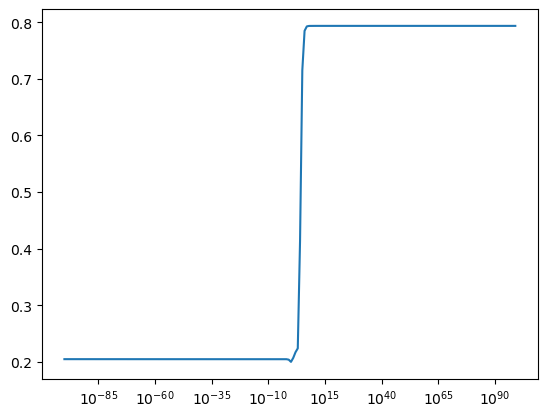

In [ ]:
errors

plt.semilogx(lambdas,errors.values())

print(list(errors.values()))

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
oplambda = min(errors, key = lambda k:errors[k])
oplambda

1.0

In [ ]:
Wav = []
def linear_regression(X_train, X_test, y_train, y_test, lamb):
    Xty = X_train.T @ y_train
    XtX = X_train.T @ X_train

    # Estimate weights for the value of lambda, on entire training set
    N, M = X_train.shape
    lambdaI = lamb * np.eye(M)
    lambdaI[0,0] = 0 # Do no regularize the bias term
    W = np.linalg.solve(XtX+lambdaI,Xty).squeeze()
    # Compute mean squared error with regularization with lambda
    Error_test = ((y_test-X_test @ W)**2).sum(axis=0)/y_test.shape[0]
    # Whatever you want
    Wav.append(W)
    MSE = Error_test
    return MSE, Wav

In [ ]:
lamb = oplambda
path = '/Users/william/Documents/University/civil engineering year 4/Semester 1 DTU/Introduction to machine learning/DTU_MachineLearning/Project2/StandardizedDataFrameWithNansFilled.csv'
tester = Tester('LifeExpectancyRegression', path_to_data=path, function_to_test=linear_regression, final_test=True, k = 10, function_variable = lamb)
errors[lamb] = tester.error

tester.results

Training and testing...: 100%|██████████| 10/10 [00:00<00:00, 627.39it/s]


TypeError: unsupported operand type(s) for +: 'int' and 'tuple'

In [1]:
list([1, 2, 3])

[1, 2, 3]